In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
import plotly.express as px



In [2]:
df = pd.read_csv('titanic.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# PassengerId: identificador único del pasajero.

# Survived: si el pasajero sobrevivió al naufragio, codificada como 0 (no) y 1 (si). Esta es la variable respuesta que interesa predecir.

# Pclass: clase a la que pertenecía el pasajero: 1, 2 o 3.

# Name: nombre del pasajero.

#Sex: sexo del pasajero.

# Age: edad del pasajero.

# SibSp: número de hermanos, hermanas, hermanastros o hermanastras en el barco.

# Parch: número de padres e hijos en el barco.

#Ticket: identificador del billete.

# Fare: precio pagado por el billete.

# Cabin: identificador del camarote asignado al pasajero.

#Embarked: puerto en el que embarcó el pasajero.

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(len(df))
df.drop_duplicates(inplace=True)
print(len(df))

891
891


In [6]:
# Parece que los valores únicos por cada columna son consistentes con la descripción de cada una y sus valores posibles

df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
# Tenemos dos variables con Nan, Age y Cabin.
# En Cabin vemos que la gran parte de Nan aparecen para gente que compró su billet en 3 clase, podría deberse a que en esa clase no se tenía camarote asignado, para nuestro análisis vamos a rellenar los NaN con los siguientes valores de su columna

df[df['Cabin'].isna()== True ].value_counts('Pclass')

Pclass
3    479
2    168
1     40
dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='Count'>

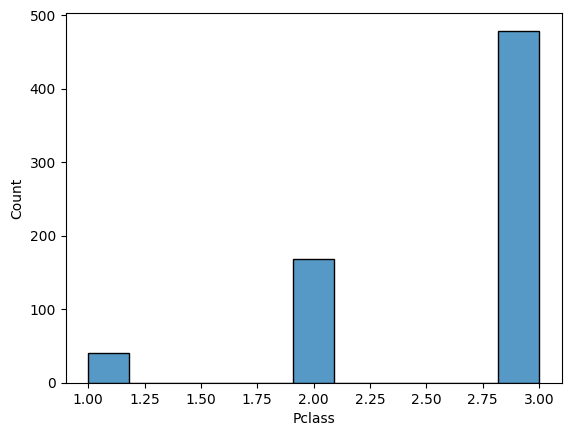

In [8]:
sns.histplot(x='Pclass', data=df[df['Cabin'].isna()== True ])

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df['Cabin'].fillna(method='bfill', inplace=True)

In [11]:
df['Cabin'].fillna(method='ffill', inplace=True)

In [12]:
df['Cabin'].isna().sum()

0

In [13]:
# Para la coluna Age tenemos 177 Nan, vamos a substituirlos por la mediana

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'].isna().sum()

0

In [14]:
df.set_index('PassengerId', inplace=True)

In [15]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C148,S


# Análisis univariables

In [16]:
# Una vez limpios los datos, vamos entenderlos mejor para hacernos una idea de cómo era la población del Titanic

In [29]:
# Vamos a difernciar dentro de sex, entre male, female y child(menor de 17), ya que creemos que la política 'mujeres y niños primero' podría haber sido aplicada en el momento de desalojar el Titanic

df.loc[(df['Age'] <= 16), 'Sex'] = 'child'
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,E46,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",child,2.0,3,1,349909,21.0750,G6,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,G6,S


/var/folders/wx/89cqn4pd7sj7hylxyj59ftk00000gn/T/ipykernel_29396/1735026910.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/wx/89cqn4pd7sj7hylxyj59ftk00000gn/T/ipykernel_29396/1735026910.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




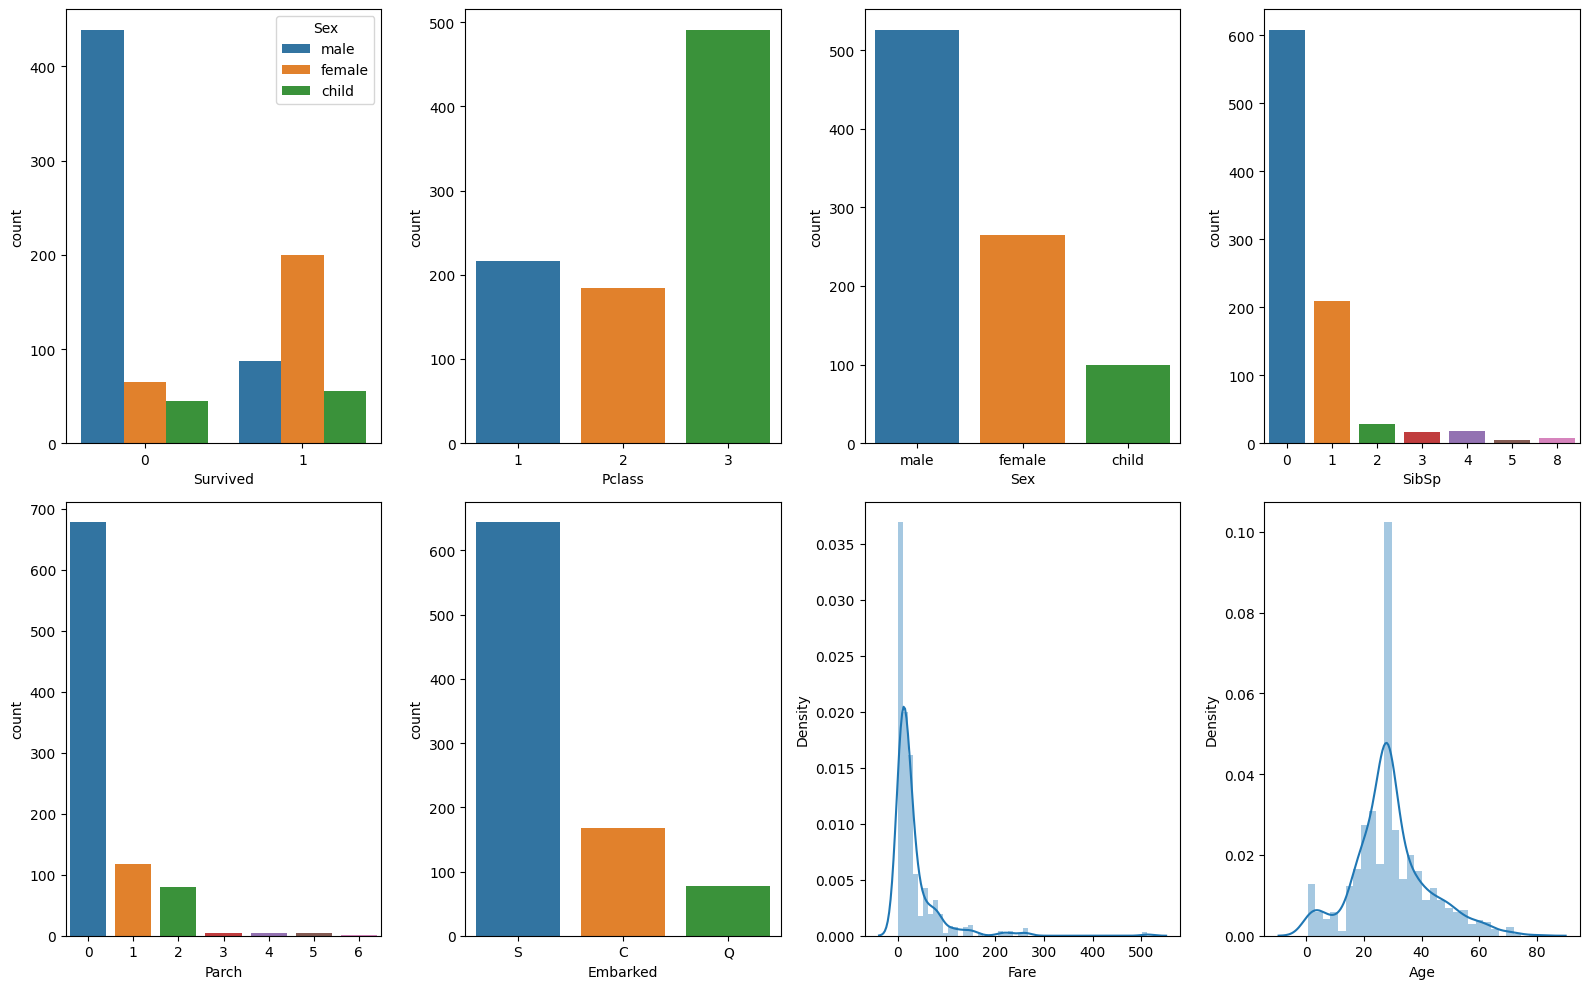

In [50]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

sns.countplot(x='Survived', data=df,hue='Sex', ax=axes[0, 0])
sns.countplot(x='Pclass', data=df, ax=axes[0, 1])
sns.countplot(x='Sex', data=df, ax=axes[0, 2])
sns.countplot(x='SibSp', data=df, ax=axes[0, 3])
sns.countplot(x='Parch', data=df, ax=axes[1, 0])
sns.countplot(x='Embarked', data=df, ax=axes[1, 1])
sns.distplot(df['Fare'], kde=True, ax=axes[1, 2]);
sns.distplot(df['Age'], kde=True, ax=axes[1, 3]);
plt.tight_layout()

plt.show();


# Análisis de relación entre variables

In [54]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Sex'])
df['Sex'] = le.transform(df['Sex'])


/var/folders/wx/89cqn4pd7sj7hylxyj59ftk00000gn/T/ipykernel_29396/2273201501.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/wx/89cqn4pd7sj7hylxyj59ftk00000gn/T/ipykernel_29396/2273201501.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

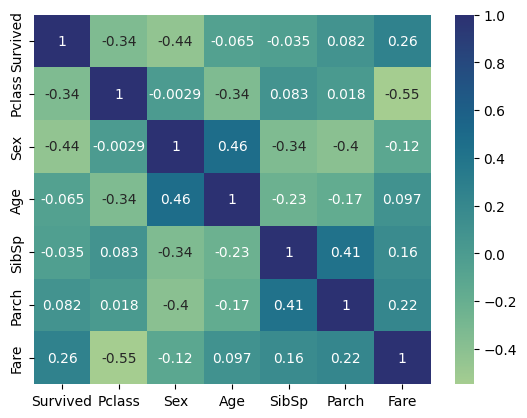

In [109]:
df.corr()
sns.heatmap(df.corr(), annot=True, cmap='crest')

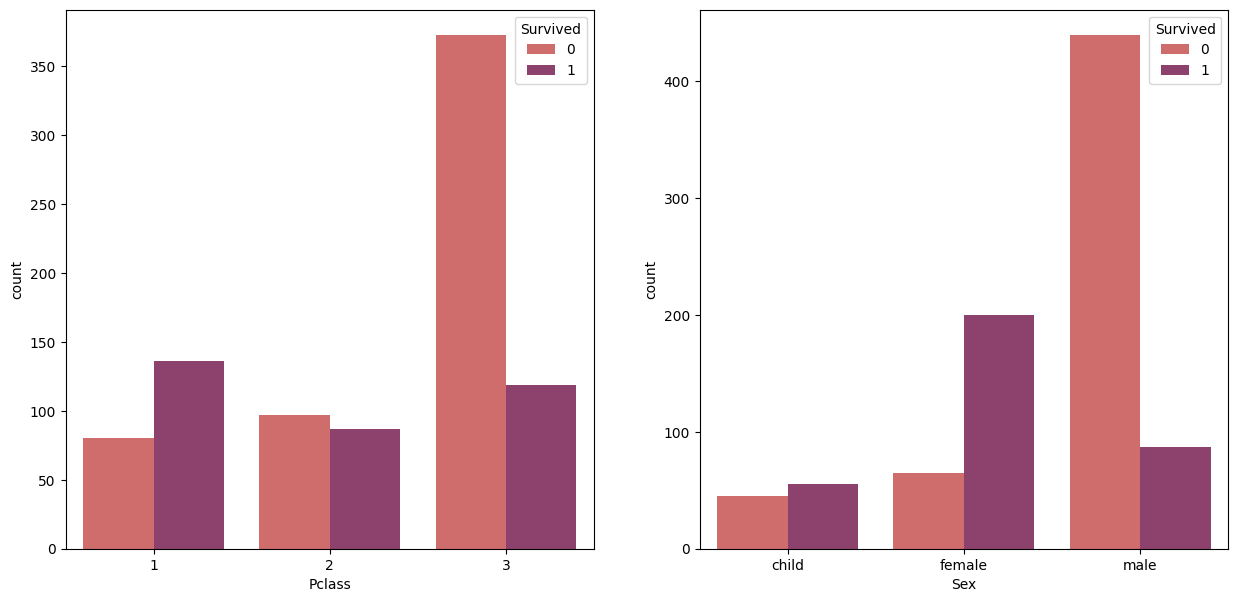

In [83]:
# Vemos pequeños indicios de que la probabilidad de sobrevivir aumenta según la clase en la que viajaban, cuan más alta es la clase, más probable es sobrevivir.
# También se observa que muejeres y niños tienen mejores tasas de supervivencia

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.countplot(x=df["Pclass"],hue = df["Survived"], palette='flare', ax=axes[0])
sns.countplot(x=df["Sex"],hue = df["Survived"], palette='flare', ax=axes[1])
axes[1].set_xticklabels(['child', 'female', 'male']);


In [91]:
# Aquí podemos confirmar como las muejeres y niños tienen mayor probabilidad de sobrevivir, no parece haber significativas diferencias por edad

fig = px.violin(df, y="Age", x="Survived", color="Sex", box=True, points="all", hover_data=df.columns, template="plotly_dark")

fig.show()

<AxesSubplot: xlabel='Embarked', ylabel='Fare'>

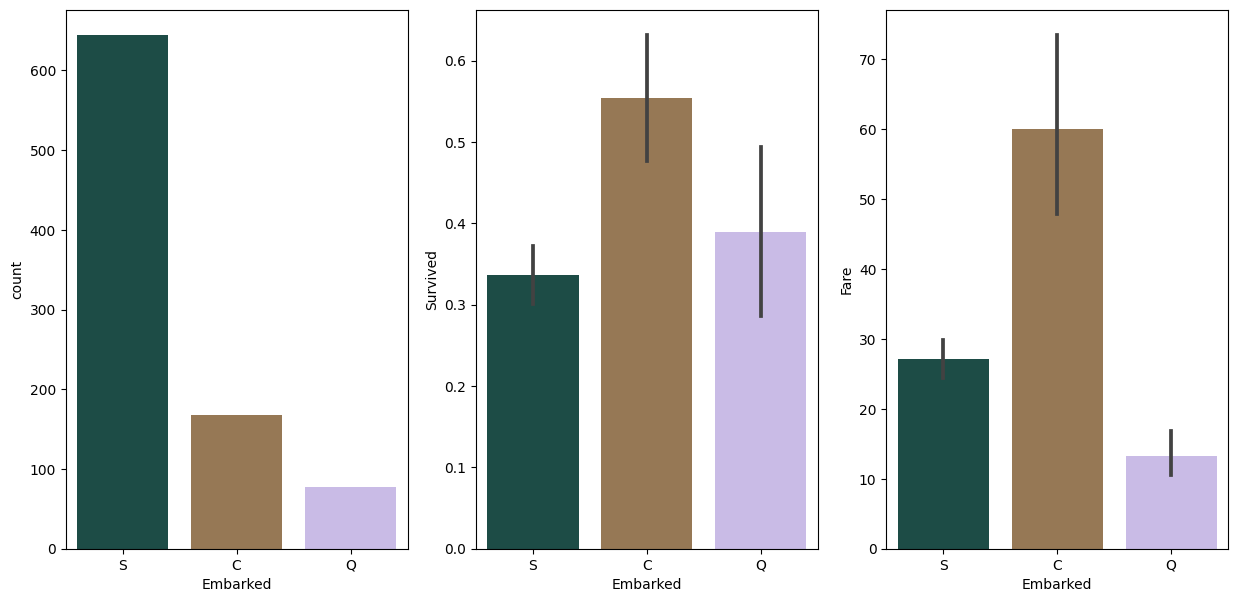

In [107]:
# Si nos fijamos en el puerto de embarque, Southampton es desde donde embarcaron la gran mayoría de pasajeros, en cambio, la mayor probabilidad de sobrevivir es para los pasajeros que subieron en Cherbourg 
# y tiene sentido si nos fijamos en la dsitrubución de precios que pagaron por el billete, significativamente mayor respecto a los otros 2 puertos.

fig, axes = plt.subplots(1, 3, figsize=(15, 7))

sns.countplot(x='Embarked', data=df,palette='cubehelix', ax=axes[0])
sns.barplot(x='Embarked',y='Survived',data=df,palette='cubehelix', ax=axes[1])
sns.barplot(x='Embarked',y='Fare',data=df,palette='cubehelix', ax=axes[2])

